In [143]:
import tensorflow as tf
import pathlib
from PIL import Image
import cv2     
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
%matplotlib inline
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [238]:
data_root = r'./dataset/'+'*/*.png'
print(data_root)

./dataset/*/*.png


In [239]:
class_name=dict()
tag_name = {1:"normal", 0:"unnormal"}

[[[  0.   0.   0.]
  [  2.   2.   2.]
  [ 15.  15.  15.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [ 11.  11.  11.]
  ...
  [  0.   0.   0.]
  [  7.   7.   7.]
  [  5.   5.   5.]]

 ...

 [[  0.   0.   1.]
  [  0.   0.   2.]
  [  1.   0.   3.]
  ...
  [123. 131. 135.]
  [168. 174. 179.]
  [  3.  11.  14.]]

 [[  0.   0.   1.]
  [  6.   8.  10.]
  [ 10.  11.  14.]
  ...
  [168. 174. 178.]
  [145. 150. 154.]
  [  3.  12.  13.]]

 [[  0.   1.   2.]
  [ 15.  19.  20.]
  [ 23.  27.  29.]
  ...
  [149. 156. 158.]
  [ 76.  82.  85.]
  [  2.  11.  12.]]]


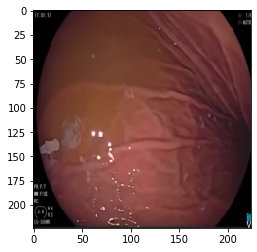

In [240]:
i = 0
train_images = list()
train_labels = list()
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
for img_path in glob(data_root):
    img = load_img(str(img_path),target_size=[224, 224])
    plt.imshow(img)
    #print(img)
    arr = img_to_array(img)
    print(arr)
    new_img = array_to_img(arr)
    train_images.append(arr)
    break
    if "unnormal" in img_path:
        class_name[i] = 0
        train_labels.append(0)
        
    else:
        class_name[i] = 1
        train_labels.append(1)
    i+=1

In [241]:
print(class_name)
print(train_images[0])

{}
[[[  0.   0.   0.]
  [  2.   2.   2.]
  [ 15.  15.  15.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [ 11.  11.  11.]
  ...
  [  0.   0.   0.]
  [  7.   7.   7.]
  [  5.   5.   5.]]

 ...

 [[  0.   0.   1.]
  [  0.   0.   2.]
  [  1.   0.   3.]
  ...
  [123. 131. 135.]
  [168. 174. 179.]
  [  3.  11.  14.]]

 [[  0.   0.   1.]
  [  6.   8.  10.]
  [ 10.  11.  14.]
  ...
  [168. 174. 178.]
  [145. 150. 154.]
  [  3.  12.  13.]]

 [[  0.   1.   2.]
  [ 15.  19.  20.]
  [ 23.  27.  29.]
  ...
  [149. 156. 158.]
  [ 76.  82.  85.]
  [  2.  11.  12.]]]


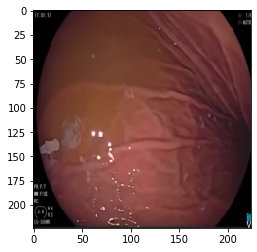

In [242]:
plt.imshow(array_to_img(train_images[0]))

In [218]:
train_images = np.array(train_images,dtype=float)
train_labels = np.array(train_labels)

In [219]:
print(train_labels)

[0 0 1 1]


In [220]:
print(train_images.shape)
print(train_labels.shape)

(4, 224, 224, 3)
(4,)


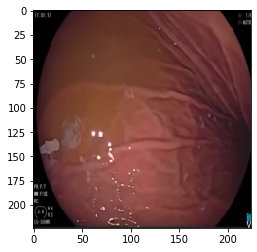

In [232]:
#print(train_images[0])
new = array_to_img(train_images[0])
plt.imshow(new)
#plt.imshow(train_images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


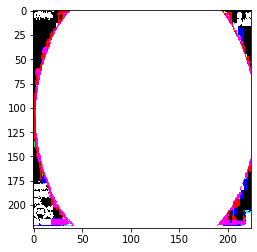

In [233]:
plt.imshow(train_images[0])

In [224]:
model = tf.keras.Sequential(
[
    layers.Flatten(input_shape=[224, 224,3]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [225]:
model.fit(train_images, train_labels, epochs=5)

Train on 4 samples
Epoch 1/5
4/4 [==============================] - 1s 137ms/sample - loss: 204.8262 - accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 0s 18ms/sample - loss: 5249.1172 - accuracy: 0.5000
Epoch 3/5
4/4 [==============================] - 0s 18ms/sample - loss: 7666.3037 - accuracy: 0.5000
Epoch 4/5
4/4 [==============================] - 0s 18ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 0s 19ms/sample - loss: 3731.6665 - accuracy: 0.5000
